<a href="https://colab.research.google.com/github/NikMilch/hotel_demaond/blob/main/Hotel_data_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [15]:
!pip install -q pyproj==1.9.6

In [16]:
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from skimage import data, color

import datetime

import re

import nltk
from nltk.corpus import stopwords

from collections import Counter

import skimage.io
from scipy.ndimage.filters import convolve
from skimage.feature import canny

from skimage.feature import Cascade
from matplotlib import patches
from skimage import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## HOTEL BOOKING DEMAND AND CANCELLATIONS

### Hotel data visualization

### Author: Nikoleta Milcheva

### Abstract

The following exploratory data analysis visualization presents two datasets - one with the hotel demand data (Resorts and City hotels in Portugal) and the other with hotels reviews (original data from Yelp about hotels in Europe).

The purpose of the hotel demand dataset analysis is to describe the hotel occupancy during the year and the main reasons for booking cancelations. The datasets contain information about bookings that has arrived and bookings that has been canceled. 

The hotel reviews datasets analysis describes the best and the worst hotels in Europe. Also, it describes what influence on guest positive reviews. Picture of the best ranked hotel has been thresholded and face recognition has been implemented. 

The data analysis is based on the hotel real data and it can be used from hotel and revenue managers. 


## Hotel bookings demand dataset

### Dataset Introduction

Number of the Resort Hotel in hotel demand dataset is double than the number of the City hotels. Resort hotels and City hotels has different number of guests, different prices and different cancelations during the year. The highest number of the guests is from Portugal and most of the bookings are made by online travel agent. The biggest influence of cancelations has lead time and previous cancelation. The purpose of the analysis is to show what is the trend based on three years data for bookings and cancellations and based on this analysis to be made prediction of what to expect in future year. This is the reason why cancelled bookings are not removed from the data.


### Previous Works

Previous researches show that most of the guests stay in City hotels between 1 and 4 days. For the Resort hotels is also usual guests to stay 7 days. City hotels has higher percent of cancellations than resort hotels and the number of cancellations is more stable during the year. Resort Hotels has more cancelation during the summer period.

Highest adr has aviation room type E (economy). By segments higher number of cancellations has online TA, offline TA and groups. Reservation status is - higher number checked outs, followed by cancellations and the smallest number are No-showns.

### Data source:

Kaggle - Hotel Bookings Demand and Hotel reviews enriched
https://www.kaggle.com/jessemostipak/hotel-booking-demand
https://www.kaggle.com/ycalisar/hotel-reviews-dataset-enriched

### Initial Data Exploration

#### 1. Reading and cleaning the data

In [18]:
# Read the file csv

hotel_bookings = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

In [19]:
# show the first 5 lines from the data
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
# show the last 2 rows from the data
hotel_bookings.tail(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.4,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.2,0,2,Check-Out,2017-09-07


In [21]:
# find the number of rows and columns 
hotel_bookings.shape

(119390, 32)

In [22]:
# show the name of the columns in order to select columns that are needed for the analysis
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [24]:
#checking if column ['hotel'] has NAN values 

hotel_bookings[hotel_bookings["hotel"].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [25]:
# select needed columns and drop NAN values
hotel_bookings[["hotel", "is_canceled", "lead_time", "stays_in_weekend_nights",
       "stays_in_week_nights","market_segment","deposit_type", "days_in_waiting_list", "customer_type", "adr"]].dropna()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,0,342,0,0,Direct,No Deposit,0,Transient,0.00
1,Resort Hotel,0,737,0,0,Direct,No Deposit,0,Transient,0.00
2,Resort Hotel,0,7,0,1,Direct,No Deposit,0,Transient,75.00
3,Resort Hotel,0,13,0,1,Corporate,No Deposit,0,Transient,75.00
4,Resort Hotel,0,14,0,2,Online TA,No Deposit,0,Transient,98.00
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,Offline TA/TO,No Deposit,0,Transient,96.14
119386,City Hotel,0,102,2,5,Online TA,No Deposit,0,Transient,225.43
119387,City Hotel,0,34,2,5,Online TA,No Deposit,0,Transient,157.71
119388,City Hotel,0,109,2,5,Online TA,No Deposit,0,Transient,104.40


In [26]:
# certain new columns that will be used later for visualization of number bookings, prices and number of number of 
# cancellations during the different months in the year

hotel_bookings["Month"] = pd.to_datetime(hotel_bookings["arrival_date_month"], format='%B', errors='coerce').dt.month
hotel_bookings = hotel_bookings.sort_values(by="Month")

In [27]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Month'],
      dtype='object')

In [28]:
RESORT_HOTELS = hotel_bookings[hotel_bookings['hotel'] == 'Resort Hotel']
CITY_HOTELS = hotel_bookings[hotel_bookings['hotel'] == 'City Hotel']

#### 2. Number of Resort and City hotels

In [29]:
# Number of city hotels and num of resort hotels 

def get_number_of_resort_and_city_hotels(dataframe):
    
    '''This function takes input dataset and calculate the number of Resort and City hotels'''
    
    resort_holtels = len(RESORT_HOTELS)
    city_hotels = len(CITY_HOTELS)
    
    return resort_holtels, city_hotels

In [30]:
resort_hotels, city_hotels = get_number_of_resort_and_city_hotels(hotel_bookings)

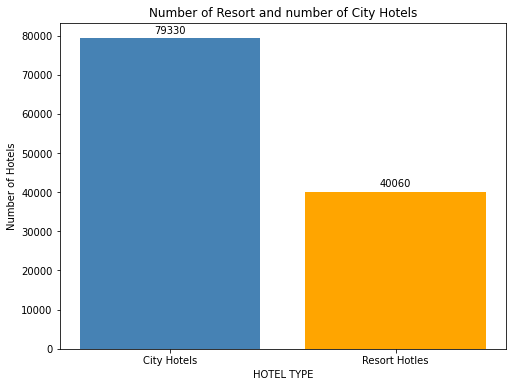

In [31]:
plt.figure(figsize=(8,6))


plt.bar(range(2), [city_hotels, resort_hotels], color = ["steelblue", "orange"])

plt.title("Number of Resort and number of City Hotels")
plt.xticks(range(2), ["City Hotels", "Resort Hotles"])
plt.xlabel("HOTEL TYPE")
plt.ylabel("Number of Hotels")

# in order to place number over the bins

for x, y in zip(range(2),[city_hotels, resort_hotels]):

    label = "{}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

Number of the Resort hotels is almost twice higher than number of the City Hotels. This is the reason why following analysis show that the number of guests and cancellations is higher for City Hotels.

#### 3. Guests by Country

In [32]:
def guest_by_country(dataframe):
    
    guest= dataframe.groupby("country")["country"].count().nlargest(10).sort_values()

    return guest


In [33]:
city_guest_country = guest_by_country(CITY_HOTELS)
resort_guest_country =  guest_by_country(RESORT_HOTELS)

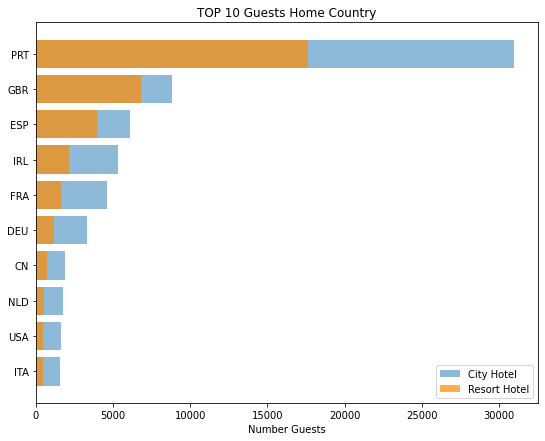

In [34]:
plt.figure(figsize=(9, 7))

plt.barh(range(len(city_guest_country)), city_guest_country, alpha = 0.5, label = 'City Hotel')
plt.barh(range(len(resort_guest_country)), resort_guest_country, color = 'darkorange', alpha = 0.7, label = "Resort Hotel")

plt.title("TOP 10 Guests Home Country")
plt.xlabel("Number Guests")
plt.yticks(range(len(resort_guest_country)), resort_guest_country.index)

plt.legend()
plt.show()

Hotels guests are from different parts of the world. The top 10 home guest countries are listed on the chart above. The highest number of the visitors come from Portugal. City Hotel guests are higher percent but the number of the city hotels is almost double than a number of resort hotel.

#### 4. Different trends during different months

In [35]:
# Creating a function that will show changes of number bookings, average monthly prices and number of cancellations

def adr_by_month(dataframe):
    
    '''group the data by months in order to calculate adr mean, guest number and number of cancellations during 
    the different months'''

    adr = (dataframe.groupby(dataframe["Month"])["adr"].mean())
    bookings = (dataframe.groupby(dataframe["Month"])["hotel"].count())
    canceled = (dataframe.groupby(dataframe["Month"])["is_canceled"].sum())
        
    bookings_not_canceled = dataframe[dataframe["is_canceled"] == 0]
    number_guests = bookings_not_canceled.groupby(bookings_not_canceled["Month"])["is_canceled"].count()
    
    return adr, bookings, canceled, number_guests


In [36]:
city_hotels_total, city_hotels_bookings, city_hotels_canceled, city_number_guests= adr_by_month(CITY_HOTELS)
resort_hotels_total, resort_hotels_bookings, resort_hotels_canceled, resort_number_guests = adr_by_month(RESORT_HOTELS)

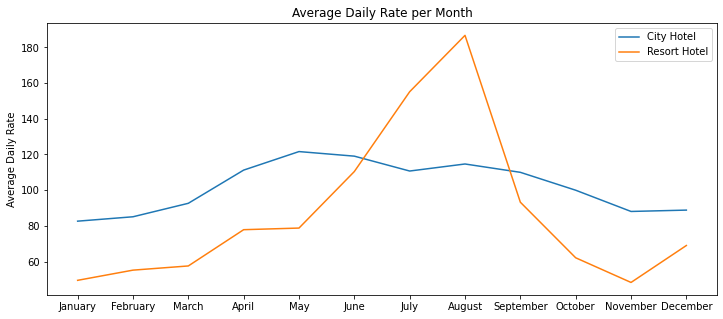

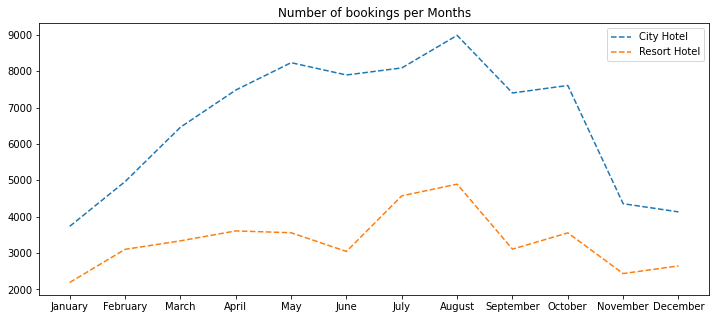

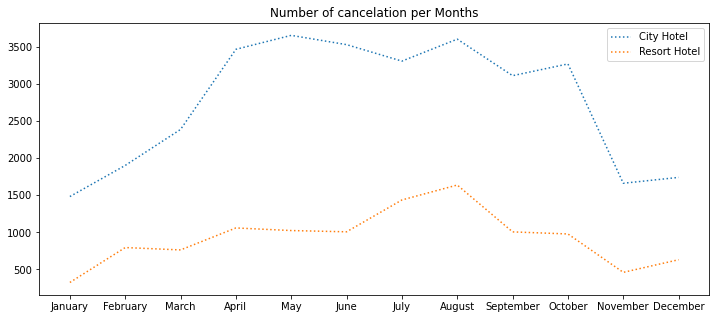

In [37]:
plt.figure(figsize=(12,5))

plt.plot(city_hotels_total.index, city_hotels_total, label = "City Hotel")
plt.plot(resort_hotels_total.index, resort_hotels_total, label = "Resort Hotel")

plt.title("Average Daily Rate per Month")
plt.xticks(resort_hotels_total.index, ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"])
plt.ylabel("Average Daily Rate")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))

plt.plot(city_hotels_bookings.index, city_hotels_bookings, label = "City Hotel", linestyle = "dashed")
plt.plot(resort_hotels_bookings.index, resort_hotels_bookings, label = "Resort Hotel", linestyle = "dashed")


plt.title("Number of bookings per Months")
plt.xticks(resort_hotels_bookings.index, ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"])
plt.legend()
plt.show()

plt.figure(figsize=(12,5))

plt.plot(city_hotels_canceled.index, city_hotels_canceled, label = "City Hotel", linestyle = "dotted")
plt.plot(resort_hotels_canceled.index, resort_hotels_canceled, label = "Resort Hotel", linestyle = "dotted")

plt.title("Number of cancelation per Months")
plt.xticks(resort_hotels_canceled.index, ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"])
plt.legend()
plt.show()

The line plot clearly describes that the resort hotel prices are much higher during the summer period. City Hotels varies less. 

The number of bookings is higher during the months July and August for both hotels, but at the same time number of cancellations during this period is higher. The lowest percent of cancellations for both hotels are during the months January and November. 

City Hotels have also high number of bookings and cancellations during the months April, May and October.

Let's remove canceled bookings and check what is the difference between number of bookings and number of the actual guests

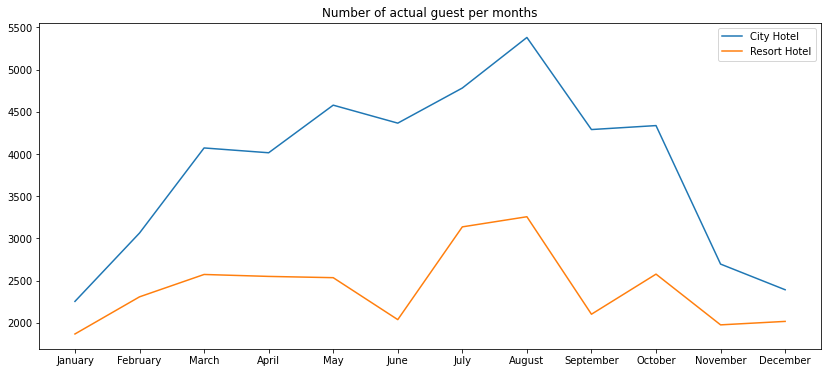

In [38]:
plt.figure(figsize=(14,6))

plt.plot(city_number_guests.index, city_number_guests, label = "City Hotel")
plt.plot(resort_number_guests.index, resort_number_guests, label = "Resort Hotel")
plt.title("Number of actual guest per months")
plt.xticks(city_number_guests.index, ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"])
plt.legend()

plt.show()

After removing canceled bookings the busiest months remain July and August. For City hotels the number of guests for May and June is much lower than bookings. Resort hotels has low number of real guests in months June and September. 

On the bar chart below you can find the proportion of the bookings and cancelations between those two types hotels during different months of the year.

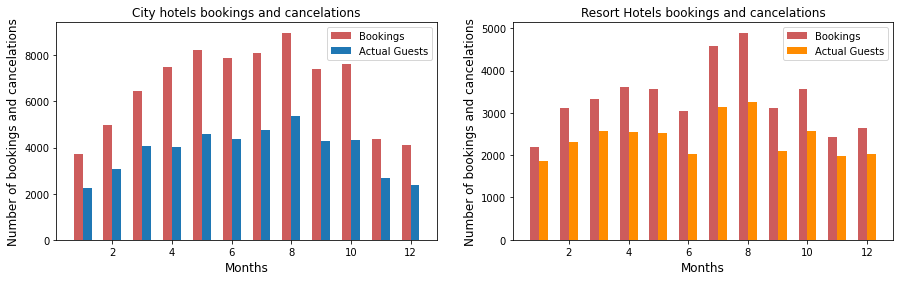

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].bar(city_hotels_bookings.index, city_hotels_bookings, width= -0.3, color = "indianred",  align = "edge", label = "Bookings")
ax[0].bar(city_number_guests.index, city_number_guests, width=0.3, align = "edge", label = "Actual Guests")
ax[0].legend()
ax[0].set_title("City hotels bookings and cancelations")
ax[0].set_xlabel("Months", fontsize = 12)
ax[0].set_ylabel("Number of bookings and cancelations", fontsize = 12)


ax[1].bar(resort_hotels_bookings.index, resort_hotels_bookings, width=-0.3, color = "indianred", align = "edge", label = "Bookings")
ax[1].bar(resort_number_guests.index, resort_number_guests, width=0.3, color ="darkorange", align = "edge", label = "Actual Guests")

ax[1].set_title("Resort Hotels bookings and cancelations")
ax[1].set_xlabel("Months", fontsize = 12)
ax[1].set_ylabel("Number of bookings and cancelations", fontsize = 12)

plt.legend()

plt.show()

#### 4. Average price

In [40]:
def adr_per_hotel_type(dataframe):
    resort_hotels_adr = dataframe.loc[dataframe["hotel"] == "Resort Hotel"]["adr"]
    city_hotels_adr = dataframe.loc[dataframe["hotel"] == "City Hotel"]["adr"]
    
    return resort_hotels_adr, city_hotels_adr

In [41]:
resort_hotels_adr, city_hotels_adr = adr_per_hotel_type(hotel_bookings)

In [42]:
data = [resort_hotels_adr, city_hotels_adr] 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


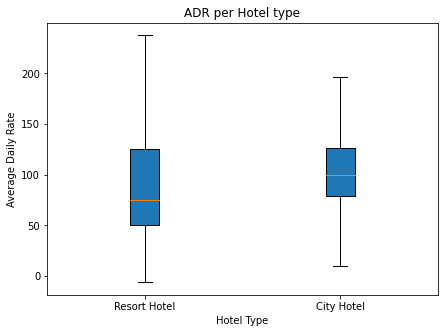

In [44]:
plt.figure(figsize = (7, 5))

plt.boxplot(data, showfliers = False, meanline = True, patch_artist = True, labels = ["Resort Hotel", "City Hotel"])
plt.title("ADR per Hotel type")
plt.xlabel("Hotel Type")
plt.ylabel("Average Daily Rate")
plt.show()

The Boxplot is created to show which hotel has higher mean adr. The highest daily price is almost the same for both hotels, but City hostels have higher mean daily price than Resort hotels. Standard deviation is bigger for Resort Hotels.

In [45]:
def adr_room_type(dataframe):
    room_types = []
    mean_adr = []

    for room, group_data in dataframe.groupby("reserved_room_type"):
        room_types.append(room)
        mean_adr.append(group_data["adr"].mean())
        
    return room_types, mean_adr

In [46]:
room_types_city_hotel, mean_adr_room_city_hotel = adr_room_type(CITY_HOTELS)
room_types_resort, mean_adr_room_resort = adr_room_type(RESORT_HOTELS)

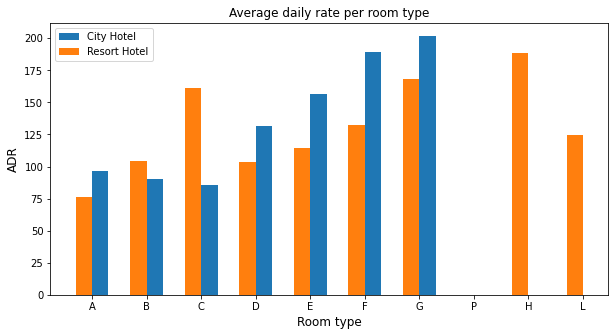

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bars for the both hotels on one fig

ax.bar(room_types_city_hotel, height = mean_adr_room_city_hotel, width= 0.3, align = "edge", label = "City Hotel")
ax.bar(room_types_resort, height = mean_adr_room_resort, width= -0.3, align = "edge", label = "Resort Hotel" )

plt.title("Average daily rate per room type")
plt.xlabel("Room type", fontsize = 12)
plt.ylabel("ADR", fontsize = 12)

plt.legend()

plt.show()


Average price depends on the room types.

Bur the information on this graph can be misleading due to anonymous data. The hotels can have different letters for the same type rooms.

In [48]:
# check for NAN values 
hotel_bookings[hotel_bookings["market_segment"].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month


In [49]:
# Find what is the differrent market segments

hotel_bookings["market_segment"].unique()

array(['Corporate', 'Online TA', 'Groups', 'Direct', 'Complementary',
       'Offline TA/TO', 'Aviation', 'Undefined'], dtype=object)

#### 6. Market segments

In [50]:
def market_segment_value(dataframe):

    segments = hotel_bookings["market_segment"].value_counts()
    
    # 'Undefined' = 2 that is 0.00% = that why it is removed
    segments = segments.drop("Undefined", axis = 0)
    
    return segments

In [51]:
segments = market_segment_value(hotel_bookings)

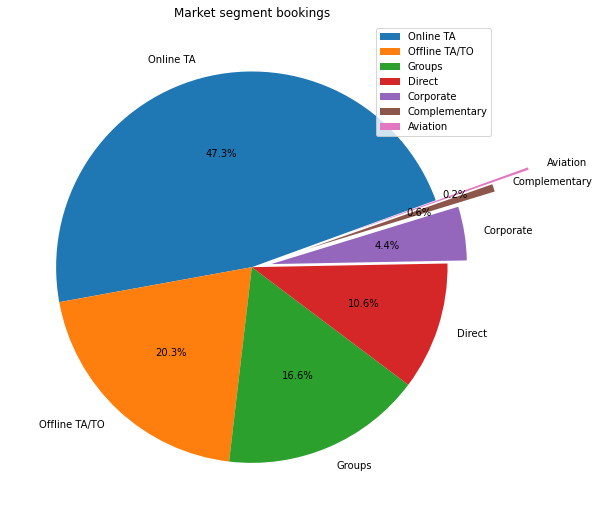

In [52]:
plt.figure(figsize=(9, 9))

explode = (0, 0, 0, 0, 0.1, 0.3, 0.5)

plt.pie(segments, labels = segments.index,  autopct="%1.1f%%", explode = explode, startangle = 20)
plt.legend(labels = segments.index, loc = "best")
plt.title("Market segment bookings")
plt.show()

Really helpful for the Marketing and Sales Managers will be the information from what channels are the most bookings made. This information can help them how to organize marketing and sales campaigns.

Almost half of the bookings are made from Online travel agent.

#### 7. Cancelation correlations

In [53]:
# lead_time 
hotel_bookings["lead_time"].corr(hotel_bookings["is_canceled"])

0.29312335576071546

In [54]:
# days in waiting list
hotel_bookings["days_in_waiting_list"].corr(hotel_bookings["is_canceled"])

0.05418582411778104

In [55]:
# stays in weekend nights
hotel_bookings["stays_in_weekend_nights"].corr(hotel_bookings["is_canceled"])

-0.0017910780782608093

In [56]:
# adr
hotel_bookings["adr"].corr(hotel_bookings["is_canceled"])

0.0475565978803859

In [57]:
# stays in week nights
hotel_bookings["stays_in_week_nights"].corr(hotel_bookings["is_canceled"])

0.024764629045872143

In [58]:
# arrival date year
hotel_bookings["arrival_date_year"].corr(hotel_bookings["is_canceled"])

0.016659860238736137

Highest correlation has lead time and is canceled. The only small insignificant negative correlation has stays in week night.


#### 8. Deposit type and cancelation

In [59]:
def depsti_canceled_data(dataframe):
    
    deposit_cancel = hotel_bookings.groupby("deposit_type")["is_canceled"].describe()
    
    return deposit_cancel

In [60]:
deposit_canceled = depsti_canceled_data(hotel_bookings)

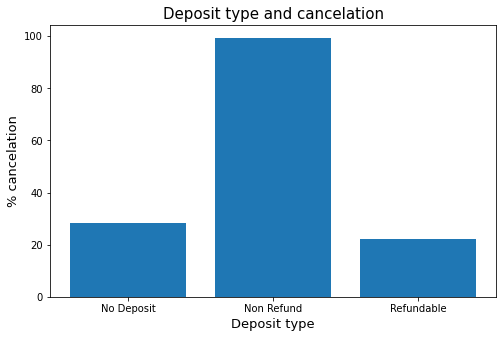

In [61]:
plt.figure(figsize=(8,5))

plt.bar(deposit_canceled.index, deposit_canceled["mean"] * 100)

plt.title("Deposit type and cancelation", fontsize = 15)

plt.xlabel("Deposit type", fontsize = 13)
plt.ylabel("% cancelation", fontsize = 13)

plt.show()

It's strange the higher number of cancelations to be Non Refund. There might be something wrong with the data or the data could contain card transactions that has not went through the system.

This bar chart doesn't provide us needed information. 

#### 9. Effects on cancelations

In [62]:
def canceled_data(dataframe):

    lead_canceled_data = hotel_bookings.groupby("lead_time")["is_canceled"].describe()
    waiting_list_canceled_data = hotel_bookings.groupby("days_in_waiting_list")["is_canceled"].describe()
    stays_in_week_nights_canceled = hotel_bookings.groupby("stays_in_week_nights")["is_canceled"].describe()
    adr_canceled_data = hotel_bookings.groupby("adr")['is_canceled'].describe()
    
    return lead_canceled_data, waiting_list_canceled_data,stays_in_week_nights_canceled, adr_canceled_data

In [63]:
lead_canceled_data, waiting_list_canceled_data, stays_in_week_nights_canceled, adr_canceled_data = canceled_data(hotel_bookings)

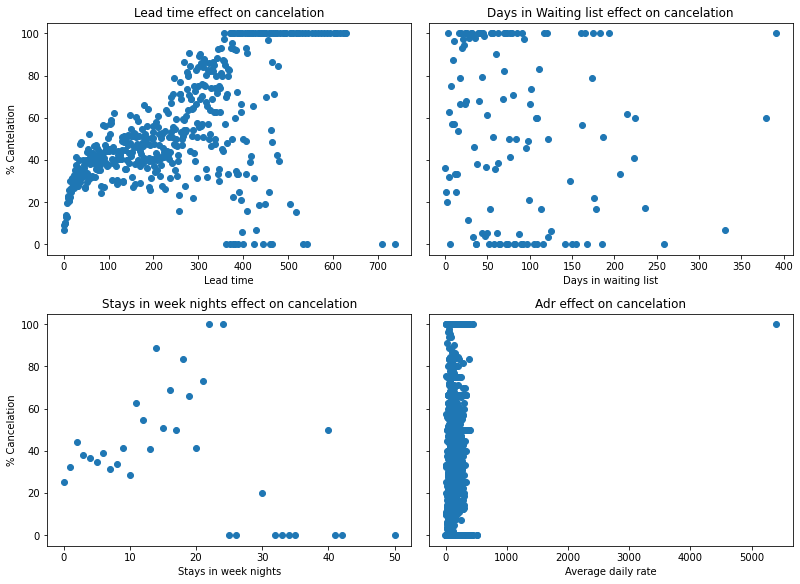

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (11, 8), sharey = True, constrained_layout=True)
#ax[0, 0].plot(x, y)
#plt.fig(figsize=(8,8))

ax[0, 0].scatter(lead_canceled_data.index, lead_canceled_data["mean"].values * 100)
ax[0, 0].set_title("Lead time effect on cancelation")
ax[0, 0].set_xlabel("Lead time")
ax[0, 0].set_ylabel("% Cantelation")
ax[0, 1].scatter(waiting_list_canceled_data.index, waiting_list_canceled_data["mean"].values * 100)
ax[0, 1].set_title("Days in Waiting list effect on cancelation")
ax[0, 1].set_xlabel("Days in waiting list")
ax[1, 0].scatter(stays_in_week_nights_canceled.index, stays_in_week_nights_canceled["mean"].values * 100)
ax[1, 0].set_title("Stays in week nights effect on cancelation")
ax[1, 0].set_xlabel("Stays in week nights")
ax[1, 0].set_ylabel("% Cancelation")
ax[1, 1].scatter(adr_canceled_data.index, adr_canceled_data["mean"].values * 100)
ax[1, 1].set_title("Adr effect on cancelation")
ax[1, 1].set_xlabel("Average daily rate")

plt.show()

Outliers are removed in order the present more accurate data.

In [65]:
def canceled_data_outlier(dataframe):

    lead_cancel_data_no_outlier  = lead_canceled_data[lead_canceled_data.index < 500]
    adr_canceled_data_no_outlier = adr_canceled_data[adr_canceled_data.index <= 400]
    waiting_list_cancel_data_no_outlier = waiting_list_canceled_data[waiting_list_canceled_data.index < 250]
    
    return lead_cancel_data_no_outlier, adr_canceled_data_no_outlier, waiting_list_cancel_data_no_outlier

In [66]:
(lead_cancel_data_no_outlier, adr_canceled_data_no_outlier, waiting_list_cancel_data_no_outlier) = canceled_data_outlier(hotel_bookings)

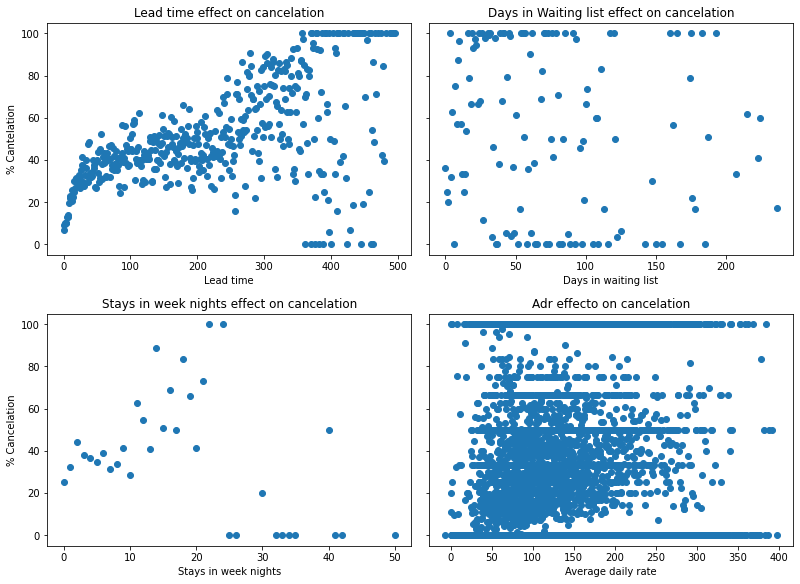

In [67]:
fig, ax = plt.subplots(2, 2, figsize = (11, 8), sharey = True, constrained_layout=True)
#ax[0, 0].plot(x, y)
#plt.fig(figsize=(8,8))

ax[0, 0].scatter(lead_cancel_data_no_outlier.index, lead_cancel_data_no_outlier["mean"].values * 100)
ax[0, 0].set_title("Lead time effect on cancelation")
ax[0, 0].set_xlabel("Lead time")
ax[0, 0].set_ylabel("% Cantelation")
ax[0, 1].scatter(waiting_list_cancel_data_no_outlier.index, waiting_list_cancel_data_no_outlier["mean"].values * 100)
ax[0, 1].set_title("Days in Waiting list effect on cancelation")
ax[0, 1].set_xlabel("Days in waiting list")
ax[1, 0].scatter(stays_in_week_nights_canceled.index, stays_in_week_nights_canceled["mean"].values * 100)
ax[1, 0].set_title("Stays in week nights effect on cancelation")
ax[1, 0].set_xlabel("Stays in week nights")
ax[1, 0].set_ylabel("% Cancelation")
ax[1, 1].scatter(adr_canceled_data_no_outlier.index, adr_canceled_data_no_outlier["mean"].values * 100)
ax[1, 1].set_title("Adr effecto on cancelation")
ax[1, 1].set_xlabel("Average daily rate")

plt.show()

Strong effect has the lead time on the cancelations. Bookings made few days before arriving are rarely canceled. 
ADR has almost insignificant influence on cancelations. 


For the rest the graphs show that there are no correlations.

In [68]:
def canceled_data_barchart(dataframe):
    lead_canceled_data2 = hotel_bookings.groupby("is_canceled")["lead_time"].mean()
    adults_canceled = hotel_bookings.groupby("is_canceled")["adults"].mean()
    previous_cancelations = hotel_bookings.groupby("is_canceled")["previous_cancellations"].mean()
    previous_bookings_not_cancelled = hotel_bookings.groupby("is_canceled")["previous_bookings_not_canceled"].mean()
    
    return lead_canceled_data2, adults_canceled, previous_cancelations, previous_bookings_not_cancelled

In [69]:
lead_canceled_data2, adults_canceled, previous_cancelations, previous_bookings_not_cancelled = canceled_data_barchart(hotel_bookings)

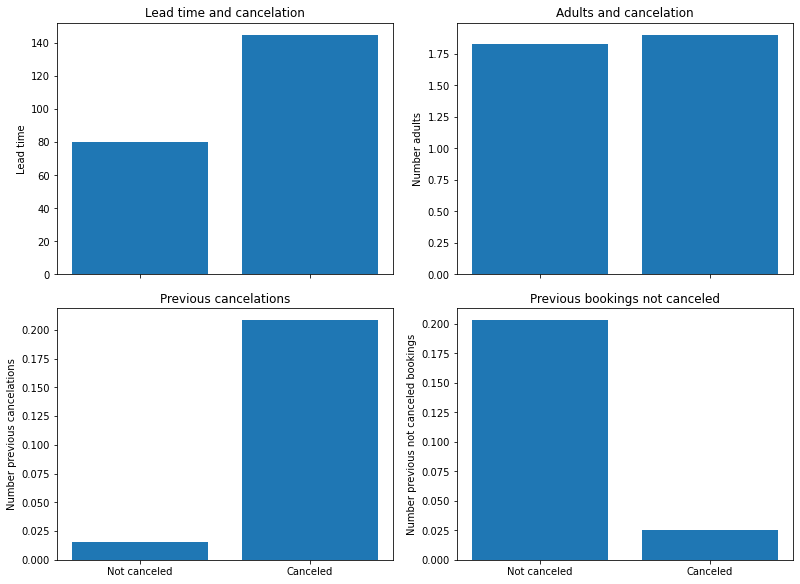

In [70]:
fig, ax = plt.subplots(2, 2, figsize = (11, 8), sharex = True, constrained_layout=True)
plt.xticks(range(2), ["Not canceled", "Canceled"])

ax[0, 0].bar(lead_canceled_data2.index, lead_canceled_data2)
ax[0, 0].set_title("Lead time and cancelation")
ax[0, 0].set_ylabel("Lead time")


ax[0, 1].bar(adults_canceled.index, adults_canceled)
ax[0, 1].set_title("Adults and cancelation")
ax[0, 1].set_ylabel("Number adults")

ax[1, 0].bar(previous_cancelations.index, previous_cancelations)
ax[1, 0].set_title("Previous cancelations")
ax[1, 0].set_ylabel("Number previous cancelations")

ax[1, 1].bar(previous_bookings_not_cancelled.index, previous_bookings_not_cancelled)
ax[1, 1].set_title("Previous bookings not canceled")
ax[1, 1].set_ylabel("Number previous not canceled bookings")

plt.show()

As shown on the scatter plot, bar plot also describes that the higher lead time effects on cancelations. Also, clients that have previous cancelations have high number of cancelations. Clients that have no previous cancelations have low number cancelations. Number of the adults has no effect on cancelations.  

## Hotel reviews

### Introduction

The file contains data from Yelp about Europe hotels and businesses nearby. The best reviewed hotels are located in Paris and the worst ranked hotels are located in Great Brittan. Positive reviews are higher number than negative reviews and more of them are submitted through mobile devices. Negative reviews are longer than positive reviews. Location data helps for plotting city hotel locations. Picture of the best reviewed hotel is downloaded from booking. 

### Previous research

There is no data for previous researches.

#### 1. Reading and cleaning the data

In [72]:
hotel_reviews = pd.read_csv('/content/drive/MyDrive/hotel_reviews_enriched.csv')

In [73]:
# Check first 5 lines of the frame

hotel_reviews.head()

,id,Hotel_Name,Hotel_Address,Hotel_Country,Hotel_State,Hotel_City,Hotel_lat,Hotel_lng,Businesses_100m,Businesses_1km,Businesses_5km,Room_Type,Room_Type_Level,Bed_Type,Tags,Guest_Type,Trip_Type,Stay_Duration,Review_Date,Day_of_Week,Day_of_Year,Days_Since_Review,Week_of_Month,Week_of_Year,Is_Hotel_Holiday,Is_Reviewer_Holiday,Quarter_of_Year,Total_Number_of_Reviews,Review_Is_Positive,Review_Positivity_Rate,Reviewer_Nationality,Reviewer_Country,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Average_Score,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Additional_Number_of_Scoring,Submitted_from_Mobile
0,13,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,8600.0,Duplex Double Room,Duplex,Double,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Couple,Leisure trip,6.0,20170803,5,215,0 days,1,31,0,0,3,1403,0,2.69608,Russia,NaN,I am so angry that i made this post available ...,397,Only the park outside of the hotel was beautiful,11,8,3,7,194,0
1,14,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,8600.0,Duplex Double Room,Duplex,Double,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Couple,Leisure trip,4.0,20170803,5,215,0 days,1,31,0,0,3,1403,1,100.00000,Ireland,IE,No Negative,0,No real complaints the hotel was great great l...,105,8,8,7,194,0
2,15,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,8600.0,Duplex Double Room,Duplex,Double,"[' Leisure trip ', ' Family with young childre...",Family with young children,Leisure trip,3.0,20170731,2,212,3 days,6,31,0,0,3,1403,0,33.33330,Australia,AU,Rooms are nice but for elderly a bit difficult...,42,Location was good and staff were ok It is cute...,21,8,7,9,194,1
3,16,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,8600.0,Duplex Double Room,Duplex,Double,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Solo traveler,Leisure trip,3.0,20170731,2,212,3 days,6,31,0,0,3,1403,0,11.01690,United Kingdom,GB,My room was dirty and I was afraid to walk bar...,210,Great location in nice surroundings the bar an...,26,8,4,1,194,0
4,17,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,8600.0,Suite,Suite,NaN,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Couple,Leisure trip,2.0,20170724,2,205,10 days,5,30,0,0,3,1403,0,5.40541,New Zealand,NZ,You When I booked with your company on line yo...,140,Amazing location and building Romantic setting,8,8,7,3,194,1


In [74]:
# Check the last lines of the frame

hotel_reviews.tail(2)

,id,Hotel_Name,Hotel_Address,Hotel_Country,Hotel_State,Hotel_City,Hotel_lat,Hotel_lng,Businesses_100m,Businesses_1km,Businesses_5km,Room_Type,Room_Type_Level,Bed_Type,Tags,Guest_Type,Trip_Type,Stay_Duration,Review_Date,Day_of_Week,Day_of_Year,Days_Since_Review,Week_of_Month,Week_of_Year,Is_Hotel_Holiday,Is_Reviewer_Holiday,Quarter_of_Year,Total_Number_of_Reviews,Review_Is_Positive,Review_Positivity_Rate,Reviewer_Nationality,Reviewer_Country,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Average_Score,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Additional_Number_of_Scoring,Submitted_from_Mobile
515736,515749,Atlantis Hotel Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,AT,9,Vienna,48.203745,16.335677,35.0,917.0,9300.0,Triple Room,NaN,Triple,"[' Leisure trip ', ' Group ', ' Standard Tripl...",Group,Leisure trip,3.0,20150817,2,229,717 day,4,34,0,0,3,2823,1,100.0000,Mexico,MX,No Negative,0,The rooms are enormous and really comfortable ...,25,8,9,3,168,0
515737,515750,Atlantis Hotel Vienna,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,AT,9,Vienna,48.203745,16.335677,35.0,917.0,9300.0,2 rooms,NaN,NaN,"[' Leisure trip ', ' Family with young childre...",Family with young children,Leisure trip,2.0,20150809,1,221,725 day,3,33,0,0,3,2823,0,31.5789,Hungary,HU,I was in 3rd floor It didn t work Free Wife,13,staff was very kind,6,8,8,1,168,0


In [75]:
hotel_reviews.shape

(515738, 41)

In [76]:
# List all of the columns from the dataframe

hotel_reviews.columns

Index(['id', 'Hotel_Name', 'Hotel_Address', 'Hotel_Country', 'Hotel_State',
       'Hotel_City', 'Hotel_lat', 'Hotel_lng', 'Businesses_100m',
       'Businesses_1km', 'Businesses_5km', 'Room_Type', 'Room_Type_Level',
       'Bed_Type', 'Tags', 'Guest_Type', 'Trip_Type', 'Stay_Duration',
       'Review_Date', 'Day_of_Week', 'Day_of_Year', 'Days_Since_Review',
       'Week_of_Month', 'Week_of_Year', 'Is_Hotel_Holiday',
       'Is_Reviewer_Holiday', 'Quarter_of_Year', 'Total_Number_of_Reviews',
       'Review_Is_Positive', 'Review_Positivity_Rate', 'Reviewer_Nationality',
       'Reviewer_Country', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts', 'Average_Score', 'Reviewer_Score',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
       'Additional_Number_of_Scoring', 'Submitted_from_Mobile'],
      dtype='object')

In [77]:
# Check the unique values column by column in order to select the columns with info that is needed 

hotel_reviews['Submitted_from_Mobile'].unique()

array([0, 1])

In [78]:
# Selecting the columns that we need for the research

hotel_data = hotel_reviews[['id', 'Hotel_Name', 'Hotel_Country', 'Hotel_City', 'Hotel_lat', 'Hotel_lng', 'Businesses_100m', 'Businesses_1km',
                           'Room_Type_Level', 'Bed_Type', 'Guest_Type', 'Stay_Duration', 'Review_Date', 'Total_Number_of_Reviews', 'Review_Is_Positive',
                           'Review_Positivity_Rate', 'Reviewer_Nationality', 'Average_Score', 'Reviewer_Score', 'Total_Number_of_Reviews_Reviewer_Has_Given',
                           'Submitted_from_Mobile']]

In [79]:
# Re-name columns 

hotel_data.columns = ['id', 'hotel_name', 'country', 'city', 'lat', 'lng', 'businesses_100m', 'businesses_1km',
                           'room_type', 'bed_type', 'guest_type', 'stay_duration', 'review_date', 'total_reviews', 'is_positive',
                           'positivity_rate', 'reviewer_nationality', 'avr_score', 'reviewer_score', 'total_reviews_reviewer_has_given',
                           'from_mobile']

In [80]:
# set id as index

hotel_data.set_index("id")

,hotel_name,country,city,lat,lng,businesses_100m,businesses_1km,room_type,bed_type,guest_type,stay_duration,review_date,total_reviews,is_positive,positivity_rate,reviewer_nationality,avr_score,reviewer_score,total_reviews_reviewer_has_given,from_mobile
id,,,,,,,,,,,,,,,,,,,,
13,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Couple,6.0,20170803,1403,0,2.69608,Russia,8,3,7,0
14,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Couple,4.0,20170803,1403,1,100.00000,Ireland,8,8,7,0
15,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Family with young children,3.0,20170731,1403,0,33.33330,Australia,8,7,9,1
16,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Duplex,Double,Solo traveler,3.0,20170731,1403,0,11.01690,United Kingdom,8,4,1,0
17,Hotel Arena,NL,Amsterdam,52.360576,4.915968,6.0,429.0,Suite,NaN,Couple,2.0,20170724,1403,0,5.40541,New Zealand,8,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515746,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,NaN,Family with older children,5.0,20150830,2823,0,12.50000,Kuwait,8,7,8,0
515747,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,Triple,Family with young children,2.0,20150822,2823,0,50.00000,Estonia,8,6,12,0
515748,Atlantis Hotel Vienna,AT,Vienna,48.203745,16.335677,35.0,917.0,NaN,NaN,Family with older children,4.0,20150819,2823,0,0.00000,Egypt,8,3,3,1


In [81]:
# checking the data types of the columns 

hotel_data.dtypes

id                                    int64
hotel_name                           object
country                              object
city                                 object
lat                                 float64
lng                                 float64
businesses_100m                     float64
businesses_1km                      float64
room_type                            object
bed_type                             object
guest_type                           object
stay_duration                       float64
review_date                           int64
total_reviews                         int64
is_positive                           int64
positivity_rate                     float64
reviewer_nationality                 object
avr_score                             int64
reviewer_score                        int64
total_reviews_reviewer_has_given      int64
from_mobile                           int64
dtype: object

In [89]:
# convert 'is_positive' and 'form_mobile' to boolean 
hotel_data[["is_positive", "from_mobile"]] = hotel_data[["is_positive", "from_mobile"]].astype("bool")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [90]:
hotel_data["review_date"] = pd.to_datetime(hotel_data["review_date"].astype(str), format = "%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
hotel_data[["is_positive", "from_mobile", "review_date"]].dtypes

is_positive              bool
from_mobile              bool
review_date    datetime64[ns]
dtype: object

#### 2. Number reviews

In [92]:
def positivity_reviews_group(dataframe):
    "Groupby the data in order to count the number of positive review and the way of submissions"
    
    positive_reviews = dataframe.groupby("is_positive")["is_positive"].count()
    mobile_devices = dataframe.groupby("from_mobile")["from_mobile"].count()
    mobile_devices_true = dataframe[hotel_data["from_mobile"] == True]
    positive_mobile_devices = dataframe.groupby("is_positive")["from_mobile"].count()
    
    return positive_reviews, mobile_devices, positive_mobile_devices

In [93]:
positive_reviews, mobile_devices, positive_mobile_devices = positivity_reviews_group(hotel_data)

In [94]:
positive_mobile_devices

is_positive
False    244158
True     271580
Name: from_mobile, dtype: int64

In [95]:
positive_reviews

is_positive
False    244158
True     271580
Name: is_positive, dtype: int64

In [96]:
mobile_devices

from_mobile
False    208098
True     307640
Name: from_mobile, dtype: int64

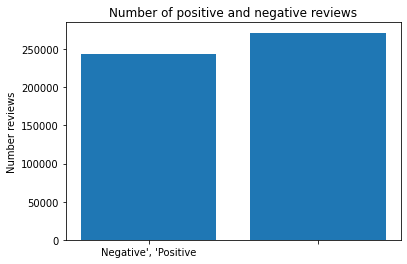

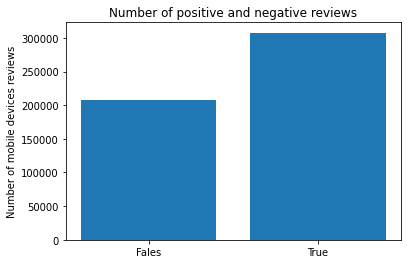

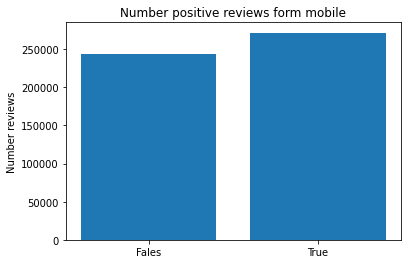

In [97]:
# Create bar plots in order to find the number of positive and negative reviews
# it is important to find which channel has been used for reviews submissions

plt.bar(positive_reviews.index, positive_reviews)
plt.title("Number of positive and negative reviews")
plt.xticks(range(2), ["Negative', 'Positive"])
plt.ylabel("Number reviews")

plt.show()

plt.bar(mobile_devices.index, mobile_devices)
plt.title("Number of positive and negative reviews")
plt.xticks(range(2), ["Fales", "True"])
plt.ylabel("Number of mobile devices reviews")

plt.show()

plt.bar(positive_mobile_devices.index, positive_mobile_devices)
plt.title("Number positive reviews form mobile")
plt.xticks(range(2), ["Fales", "True"])
plt.ylabel("Number reviews")

plt.show()

Bar charts describe that positive reviews are more than negative reviews. Most of the reviews are submitted from mobile phone - positive reviews are higher number.

#### 3. Correlations

In [98]:
# Finding correlation between different columns
hotel_data["total_reviews"].corr(hotel_data["positivity_rate"])

-0.06341834328737586

In [99]:
hotel_data["positivity_rate"].corr(hotel_data["avr_score"])

0.1863456325311103

In [100]:
hotel_data["stay_duration"].corr(hotel_data["positivity_rate"])

-0.015384144909829128

In [101]:
hotel_data["businesses_1km"].corr(hotel_data["positivity_rate"])

0.057353073885860875

In [102]:
hotel_data["total_reviews"].corr(hotel_data["positivity_rate"])

-0.06341834328737586

There is not high correlation between columns

#### 4. Effect nearby businesses on positivity rate 

In [103]:
# Corr will be displayed only for the last day from the dataset

hotel_data_after_2017 = hotel_data[hotel_data["review_date"] >= "2017-08-01"]

In [104]:
def corr_businesses_and_hotle_location(dataframe):
    
    positive_rate_business = dataframe.groupby("positivity_rate")["businesses_1km"].describe()
    corr_business = dataframe.groupby("businesses_100m")["businesses_1km"].describe()
    average_score_and_businesses = dataframe.groupby("avr_score")["businesses_1km"].count()
    
    return corr_business, positive_rate_business, average_score_and_businesses

In [105]:
corr_business, positive_rate_business, average_score_and_businesses = corr_businesses_and_hotle_location(hotel_data_after_2017)

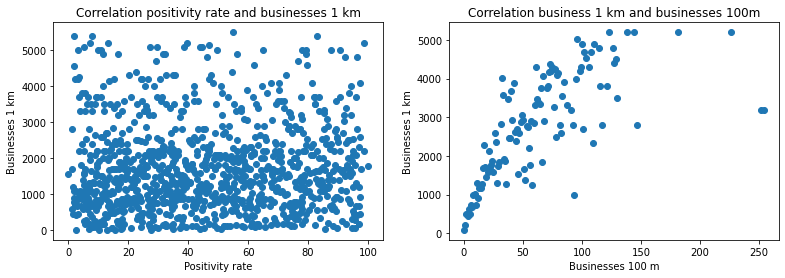

In [106]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))

ax[0].scatter(positive_rate_business.index, positive_rate_business["mean"])
ax[0].set_title("Correlation positivity rate and businesses 1 km")
ax[0].set_xlabel("Positivity rate")
ax[0].set_ylabel("Businesses 1 km")

ax[1].scatter(corr_business.index, corr_business["mean"])
ax[1].set_title("Correlation business 1 km and businesses 100m")
ax[1].set_xlabel("Businesses 100 m")
ax[1].set_ylabel("Businesses 1 km")


plt.show()

There is no effect Businesses 1 km on the positivity rate. There is a link between Business 100 m and Businesses 1 km. 

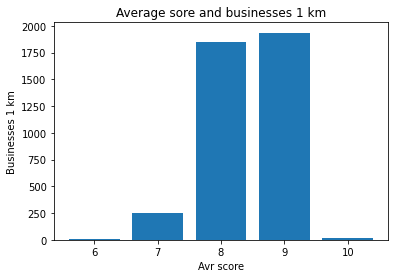

In [107]:
plt.bar(average_score_and_businesses.index, average_score_and_businesses)
plt.title("Average sore and businesses 1 km")
plt.xlabel("Avr score")
plt.ylabel("Businesses 1 km")

plt.show()

If there is a busnesses nearby 1 km the average reviews score is 8, 9.

#### 4. Countries with best and worst reviews

In [108]:
def country_and_positivity_rate(dataframe):
    
    "Using for cycle to group countries and mean rate"
    
    country = []
    mean_rate = []

    for country_name, group_data in dataframe.groupby("country"):
        country.append(country_name)
        mean_rate.append(group_data.positivity_rate.mean())
    
    return country, mean_rate

In [109]:
country, mean_rate = country_and_positivity_rate(hotel_data_after_2017)

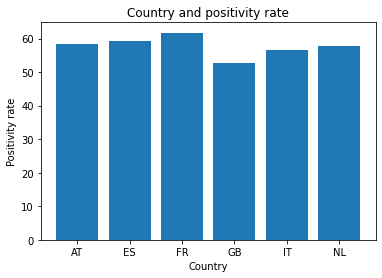

In [110]:
plt.bar(country, mean_rate)
plt.title("Country and positivity rate")
plt.xlabel("Country")
plt.ylabel("Positivity rate")
plt.show()


Hotels with best reviews are in France and hotels with worst reviews are in Great Britton.

#### 5. Hotels with best and worst reviews

In order to analysis the structure of the reviews it should be find the hotels with best and worst reviews

In [111]:
def best_and_worst_hotel_reviews(dataframe):

    best_hotels_reviews = dataframe.groupby("hotel_name")["positivity_rate"].mean().sort_values(ascending = False).head(10)
    worst_hotels_reviews = dataframe.groupby("hotel_name")["positivity_rate"].mean().sort_values(ascending = True).head(10)
    
    return best_hotels_reviews, worst_hotels_reviews

In [112]:
best_hotels_reviews, worst_hotels_reviews = best_and_worst_hotel_reviews(hotel_data)

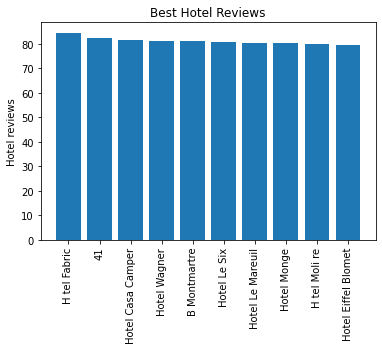

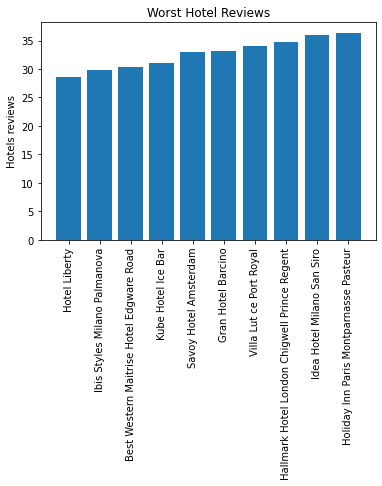

In [113]:
plt.bar(range(len(best_hotels_reviews)) , best_hotels_reviews)
plt.title("Best Hotel Reviews")
plt.xticks(range(len(best_hotels_reviews)), best_hotels_reviews.index, rotation = "vertical")
plt.ylabel("Hotel reviews")

plt.show()
plt.bar(range(len(worst_hotels_reviews)) , worst_hotels_reviews)
plt.xticks(range(len(worst_hotels_reviews)), worst_hotels_reviews.index, rotation = "vertical")
plt.title("Worst Hotel Reviews")
plt.ylabel("Hotels reviews")
plt.show()


### 6. Plot hotels location on the map

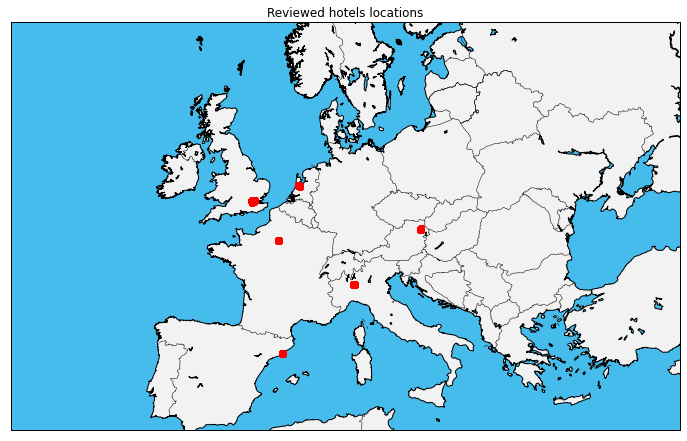

In [114]:
plt.figure(figsize = (12, 10))
m = Basemap(llcrnrlon=-20,llcrnrlat=35,
            urcrnrlon= 48,urcrnrlat=52,
            resolution="i", # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection="merc", # The projection style is what gives us a 2D view of the world for this
            lon_0=-0.1,lat_0=51.5, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

m.drawmapboundary(fill_color="#46bcec") # Make your map into any style you like
m.fillcontinents(color="#f2f2f2",lake_color="#46bcec") # Make your map into any style you like
m.drawcoastlines()
#m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
m.shadedrelief()

x, y = m(hotel_data.lng.tolist(), 
         hotel_data.lat.tolist())

m.plot(x, y,"o", color = "red")

plt.title("Reviewed hotels locations")

plt.show()

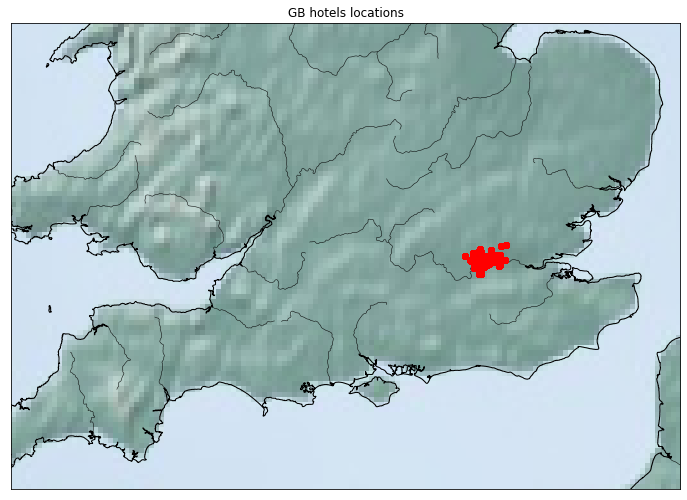

In [115]:
plt.figure(figsize = (12, 10))
m = Basemap(llcrnrlon=-5,llcrnrlat=50,
            urcrnrlon= 2,urcrnrlat=53,
            resolution="f", # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection="merk", # The projection style is what gives us a 2D view of the world for this
            lon_0=-0.11,lat_0=51.5, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

#m.drawmapboundary()# Make your map into any style you like
#m.fillcontinents(color='coral',lake_color='aqua') # Make your map into any style you like
m.drawcoastlines()
m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
m.shadedrelief()
x, y = m(hotel_data.lng.tolist(), 
         hotel_data.lat.tolist())

m.plot(x, y,"o", color = "red")

plt.title("GB hotels locations")

plt.show()

#### 7. Analysis of  text of the positive and negative reviews

In [116]:
# Selected needed columns and sort values by Review positivity rate in order to find the best and worst reviews

hotel_reviews_analysis = hotel_reviews[["Hotel_Name","Positive_Review", "Negative_Review", "Review_Positivity_Rate"]].sort_values("Review_Positivity_Rate", ascending = False)

In [117]:
hotel_reviews_analysis

,Hotel_Name,Positive_Review,Negative_Review,Review_Positivity_Rate
377136,IntercityHotel Wien,excellent front office stuff excellent location,No Negative,100.0
269095,Hilton Vienna,Great location Just in front of the Wien Mitte...,No Negative,100.0
100058,Mercure Paris Centre Tour Eiffel,Nothing in this hotel,No Negative,100.0
100061,Mercure Paris Centre Tour Eiffel,The whole hotel was clean staff were very help...,No Negative,100.0
100062,Mercure Paris Centre Tour Eiffel,Excellent Service,No Negative,100.0
...,...,...,...,...
223302,Rydges Kensington Hotel,No Positive,Genlteman at the front desk told me it would b...,0.0
223291,Rydges Kensington Hotel,No Positive,Room was too small with only 1 very small desk...,0.0
431335,Hotel Roemer Amsterdam,No Positive,Room was smaller for us USA travelers but the ...,0.0
223278,Nell Hotel Suites,No Positive,Never received my deposit back,0.0


In [118]:
# Hotel Fabric located in Paris is with the best reviews

h_fabric = hotel_reviews_analysis[hotel_reviews_analysis["Hotel_Name"] == "H tel Fabric"]

In [149]:
# Row by row read first 31 comments and has been manually saved in text file best hotel reviews
h_fabric.iloc[30,1]

'Very fresh and elegant modern decor staff were always so welcoming and offered great advise to make our stay as enjoyable as possible '

In [165]:
best_hotel_reviews = ""
with open("/content/drive/MyDrive/best_hotel_rewies.txt", "r", encoding = "utf-8") as file:
    best_hotel_reviews = file.read()

In [170]:
# It is important to find the len of the positive reviews and compare with the len of the negative reviews

len(best_hotel_reviews)

2362

In [172]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [173]:
stop = set(stopwords.words("english"))

In [174]:
best_hotel_reviews = re.split("\W+", best_hotel_reviews)
best_hotel_reviews = [word.lower() for word in best_hotel_reviews]

In [175]:
best_reviews_hotel_words = [word for word in best_hotel_reviews if word not in stop]

In [176]:
best_hotel_counter_words = Counter(best_reviews_hotel_words)

In [177]:
best_hotel_counter_words.most_common(20)

[('staff', 17),
 ('great', 13),
 ('hotel', 10),
 ('friendly', 10),
 ('helpful', 8),
 ('breakfast', 7),
 ('super', 6),
 ('lovely', 6),
 ('stay', 5),
 ('location', 5),
 ('room', 4),
 ('rooms', 4),
 ('clean', 4),
 ('quiet', 3),
 ('place', 3),
 ('welcoming', 3),
 ('perfect', 3),
 ('stylish', 3),
 ('honesty', 3),
 ('bar', 3)]

In [178]:
# Hotel Liberty is with worst reviews

h_liberty = hotel_reviews_analysis[hotel_reviews_analysis["Hotel_Name"] == "Hotel Liberty"].sort_values('Review_Positivity_Rate', ascending = True)

In [179]:
# Row by row read first 31 comments and has been manualy saved in text file best hotel reviews

h_liberty.iloc[30,2]

'The room was not clean the bathroom was really dirty so that we needed to tell the staff to clean the bathroom to take a shower which was really not clean in the end The rooms looking at the garden were dark the ones on the road side were really noisy The hotel was with 4 stars which in my opinion not even close to 2 stars You can think of the hotel as a hostel '

In [180]:
worst_hotel_reviews = ""
with open("/content/drive/MyDrive/worst_hotel_rewies.txt", "r", encoding = "utf-8") as file:
    worst_hotel_reviews = file.read()

In [181]:
num_itimes_worst_hotel_reviews = len(worst_hotel_reviews)

In [182]:
num_itimes_worst_hotel_reviews

6614

Length of the negative reviews is almost three times higher than the length of te positive reviews

In [183]:
worst_hotel_reviews = re.split("\W+", worst_hotel_reviews)
worst_hotel_reviews = [word.lower() for word in worst_hotel_reviews]

In [184]:
worst_review_hotel_words = [word for word in worst_hotel_reviews if word not in stop]

In [185]:
worst_review_counter_words = Counter(worst_review_hotel_words)

In [186]:
worst_review_counter_words.most_common(20)

[('room', 25),
 ('hotel', 25),
 ('dirty', 14),
 ('shower', 10),
 ('staff', 9),
 ('really', 8),
 ('4', 8),
 ('star', 8),
 ('even', 8),
 ('bathroom', 8),
 ('wifi', 7),
 ('breakfast', 7),
 ('bad', 7),
 ('like', 7),
 ('rooms', 7),
 ('work', 6),
 ('2', 6),
 ('dust', 5),
 ('water', 5),
 ('one', 5)]

#### 8. Work with images from booking

In [187]:
# image is dowloaded from booking.com

best_hotel_room = skimage.io.imread("/content/drive/MyDrive/hotel_fabric.jpg")

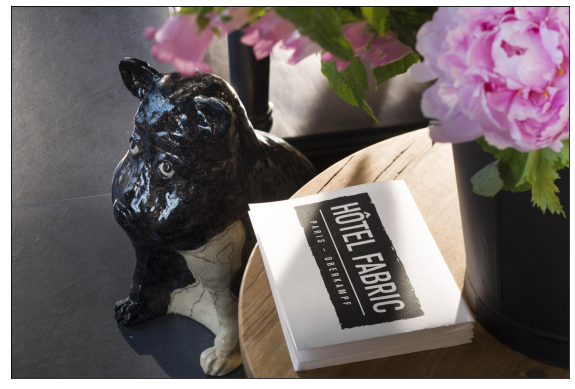

In [188]:
plt.figure(figsize = (10, 10))

plt.imshow(best_hotel_room)
plt.xticks([])
plt.yticks([])
plt.show()

In [189]:
best_hotel_room[0][0]

array([109, 107, 108], dtype=uint8)

In [190]:
def image_rgv2gray_channels(dataframe):
    "separate the channels"
    
    red_channel = dataframe[:, :, 0]
    green_channel = dataframe[:, :, 1]
    blue_channel = dataframe[:, :, 2]
    
    return red_channel, green_channel, blue_channel

In [191]:
red_channel, green_channel, blue_channel = image_rgv2gray_channels(best_hotel_room)

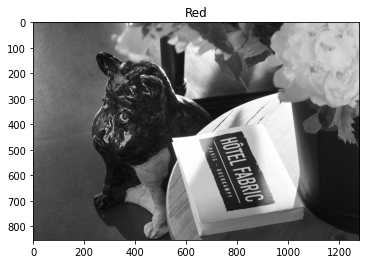

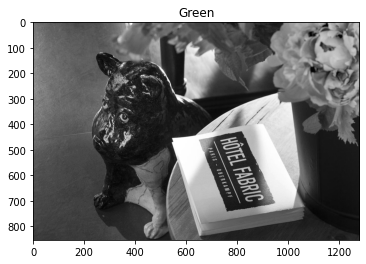

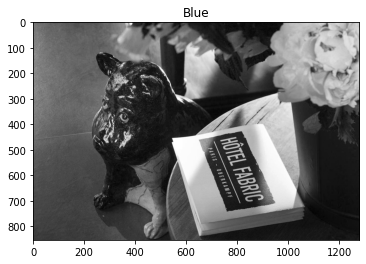

In [192]:
# Plot pictures with main channels

plt.imshow(red_channel, cmap = "gray")
plt.title("Red")
plt.show()
plt.imshow(green_channel, cmap = "gray")
plt.title("Green")
plt.show()
plt.imshow(blue_channel, cmap = "gray")
plt.title("Blue")
plt.show()

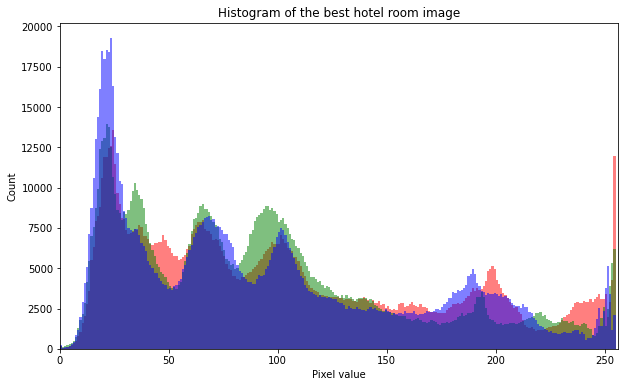

In [193]:
# Create a histogram 

plt.figure(figsize = (10, 6))


plt.title("Histogram of the best hotel room image")

plt.hist(red_channel.ravel(), bins = range(0, 256), color = "r", alpha = 0.5)
plt.hist(green_channel.ravel(), bins = range(0, 256), color = "g", alpha = 0.5)
plt.hist(blue_channel.ravel(), bins = range(0, 256), color = "b", alpha = 0.5)

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.xlim(0, 256)

plt.show()

In [194]:
is_smaller = red_channel <= 50
thresholded_image = red_channel.copy()
thresholded_image[is_smaller] = 0
thresholded_image[~is_smaller] = 255

In [195]:
binary = red_channel > 80

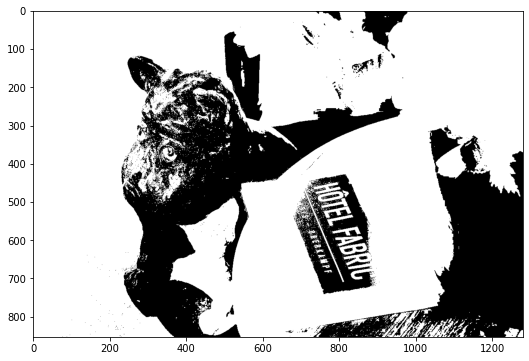

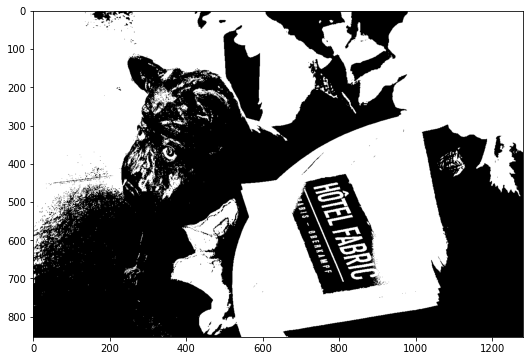

In [196]:
plt.figure(figsize = (10, 6))


plt.imshow(thresholded_image, cmap = "gray")
plt.show()

plt.figure(figsize = (10, 6))
plt.imshow(binary, cmap ="gray")
plt.show()

In [197]:
canny_edges = canny(binary)

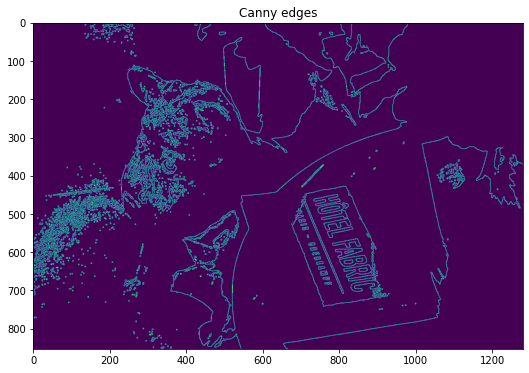

In [198]:
# plot threshold image
plt.figure(figsize = (10, 6))
plt.imshow(canny_edges)
plt.title('Canny edges')
plt.show()

In [203]:
detect_face = skimage.io.imread("/content/drive/MyDrive/detect_face.jpg")

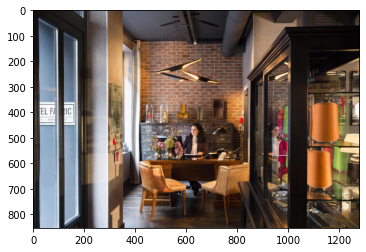

In [204]:
plt.imshow(detect_face)

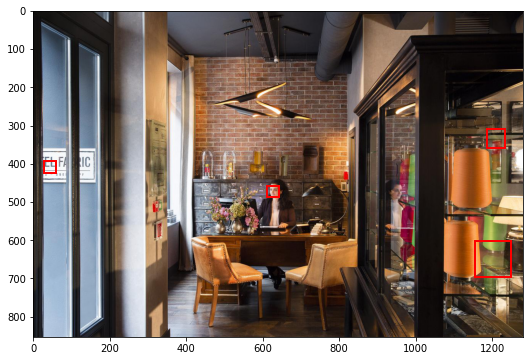

In [210]:
# how face detection can be applied on pictures

trained_file = skimage.data.lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)


detected = detector.detect_multi_scale(img = detect_face,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200,200))

plt.figure(figsize = (10, 6))

plt.imshow(detect_face)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()
    

### Conclusion

This analysis could be used for education of Sales and Marketing Managers. Based on the data it can be also made prediction model for future hotel bookings and future cancelations. This prediction model can help management to plan number staff its needed and can predict stuff like food and sanitary requirements. Data and review analysis can helps improving level of customer service and levels of hotels sanitary. It could increase number of the gests and customer satisfaction. 


#### Bibliography

https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
https://www.sciencedirect.com/science/article/pii/S2352340918315191
 https://www.kaggle.com/jessemostipak/hotel-booking-demand
\https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations
\https://www.kaggle.com/vssseel/eda-various-ml-models-and-nn-with-roc-curves
\https://www.kaggle.com/anshularya/eda-predictive-analysis-for-hotel-booking-data
\https://www.kaggle.com/duygut/eda-booking-cancelation-prediction
\\https://www.kaggle.com/feilinhu/hotel-booking-data-visualisation
\https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
\https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
\https://www.datacamp.com/?utm_source=adwords_ppc&utm_campaignid=1242944157&utm_adgroupid=58673827368&utm_device=c&utm_keyword=datacamp&utm_matchtype=e&utm_network=g&utm_adpostion=&utm_creative=340731356767&utm_targetid=aud-334851567295:kwd-297372810188&utm_loc_interest_ms=&utm_loc_physical_ms=1001464&gclid=EAIaIQobChMItpH9vfaT6wIV1IBQBh0Vmgp1EAAYASAAEgJQm_D_BwE\https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.annotate.html
\https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
\https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html
\https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
\https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html
\https://www.kaggle.com/ycalisar/hotel-reviews-dataset-enriched
\https://matplotlib.org/basemap/
\https://stackoverflow.com/questions/35877058/matplotlib-annotate-basemap-in-data-coordinates
\https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html
\https://www.booking.com/hotel/fr/ha-tel-fabric.en-gb.html?aid=311984;label=ha-tel-fabric-6DRBiPUGOtJYcEtAQqkMzwS253761382790%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atiaud-294080459026%3Akwd-53906045192%3Alp1001464%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTQUGSsRwx9_3qo3uPTHyoo;sid=f12a443dd295d88c060e3a432820cbd0;dest_id=-1456928;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1597176267;srpvid=6ccc8d2523d1000a;type=total;ucfs=1&#hotelTmpl
\https://scikit-image.org/docs/dev/auto_examples/applications/plot_face_detection.html
\https://scikit-image.org/docs/dev/auto_examples/applications/plot_haar_extraction_selection_classification.html
